In [135]:
!pip install nltk


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [136]:
pip install beautifulsoup4



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [137]:
import pandas as pd
import re
from gensim.parsing.preprocessing import STOPWORDS, strip_tags,strip_numeric, strip_punctuation, strip_multiple_whitespaces,remove_stopwords, strip_short, stem_text
import pickle
from transformers import BertTokenizer
import nltk


In [138]:
import numpy as np

In [139]:
import re
import string
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize

In [140]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shashinimashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
from nltk.corpus import stopwords

In [142]:
# Load the CSV file
file_path = '/Users/shashinimashi/Desktop/Semester 3/Thesis/Analysis/Research_OAI-1/transcripts.csv'  
df = pd.read_csv(file_path)

In [143]:
df.head()

,ResponseID,Topic,Transcription
0,510,Supporting Responsible Ai Discussion Paper,The Australian Federal Police Afp Welcomes The...
1,507,Safe And Responsible Ai In Australia’,The Disr Have Called For Public Submissions To...
2,506,Safe And Responsible Ai In Australia\r\nDiscus...,The Office Of The Australian Information Commi...
3,505,Canvas Approach To Ai,Canvas Mission Is To Empower The World To Desi...
4,504,Safe And Responsible Ai In\r\nAustralia,The Law Council Welcomes The Opportunity To Pr...


In [144]:
df.columns

Index(['ResponseID', 'Topic', 'Transcription'], dtype='object')

In [145]:
df.value_counts

<bound method DataFrame.value_counts of      ResponseID                                              Topic  \
0           510         Supporting Responsible Ai Discussion Paper   
1           507              Safe And Responsible Ai In Australia’   
2           506  Safe And Responsible Ai In Australia\r\nDiscus...   
3           505                              Canvas Approach To Ai   
4           504            Safe And Responsible Ai In\r\nAustralia   
..          ...                                                ...   
411           7  Epistemic Virtues Of Harnessing Rigorous\r\nMa...   
412           6  Ai Explainability Framework For Environmental ...   
413           4  Submission To Responsible Ai In Australia – Ga...   
414           2  Ben Blackburn Racing Submission\r\nOn The Aust...   
415           1                             Make A General Comment   

                                         Transcription  
0    The Australian Federal Police Afp Welcomes The...  
1    

In [146]:
#  Calculate word count for each transcription
df['word_count'] = df['Transcription'].apply(lambda x: len(str(x).split()))

# Get descriptive statistics for the word count
word_count_stats = df['word_count'].describe()

print(word_count_stats)

count    416.000000
mean     240.641827
std      140.267280
min        1.000000
25%      144.000000
50%      221.000000
75%      309.000000
max      710.000000
Name: word_count, dtype: float64


In [147]:
# Count the non-empty rows in 'Transcription' column
non_empty_rows = df['Transcription'].str.strip().astype(bool).sum()

# Count the empty rows (including NaN values) in 'Transcription' column
empty_rows = df['Transcription'].isna().sum() + (df['Transcription'].str.strip().astype(bool) == False).sum()

# Print the results
print(f"Non-empty rows: {non_empty_rows}")
print(f"Empty rows: {empty_rows}")


Non-empty rows: 416
Empty rows: 8


In [148]:
# Filtering Empty rows
print(f"Rows before filtering: {df.shape[0]}")
df = df[df['Transcription'].str.strip().astype(bool) & df['Transcription'].notna()]
print(f"Rows after filtering: {df.shape[0]}")

Rows before filtering: 416
Rows after filtering: 408


In [149]:
import numpy as np

# Word count check for 'Transcription' column
# Step 1: Calculate word counts for each text in the 'Transcription' column
df['transcription_word_count'] = df['Transcription'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Step 2: Calculate and print statistics for the 'Transcription' column
transcription_avg = np.mean(df['transcription_word_count'])
transcription_min = np.min(df['transcription_word_count'])
transcription_max = np.max(df['transcription_word_count'])

# Step 3: Display the statistics
print(f"Transcription - Average length: {transcription_avg:.2f} words")
print(f"Transcription - Minimum length: {transcription_min} words")
print(f"Transcription - Maximum length: {transcription_max} words")

# Optional: Display the word counts in the DataFrame for better insight
print("\nText Lengths (Word Counts) per Text:")
print(df[['Transcription', 'transcription_word_count']].head())

Transcription - Average length: 245.34 words
Transcription - Minimum length: 1 words
Transcription - Maximum length: 710 words

Text Lengths (Word Counts) per Text:
                                       Transcription  transcription_word_count
0  The Australian Federal Police Afp Welcomes The...                       518
1  The Disr Have Called For Public Submissions To...                       213
2  The Office Of The Australian Information Commi...                       545
3  Canvas Mission Is To Empower The World To Desi...                       103
4  The Law Council Welcomes The Opportunity To Pr...                       410


/var/folders/s1/xx81lcvn0kq8swqwckfrftb40000gn/T/ipykernel_56461/2615125692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transcription_word_count'] = df['Transcription'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)


Text(0, 0.5, 'Frequency')

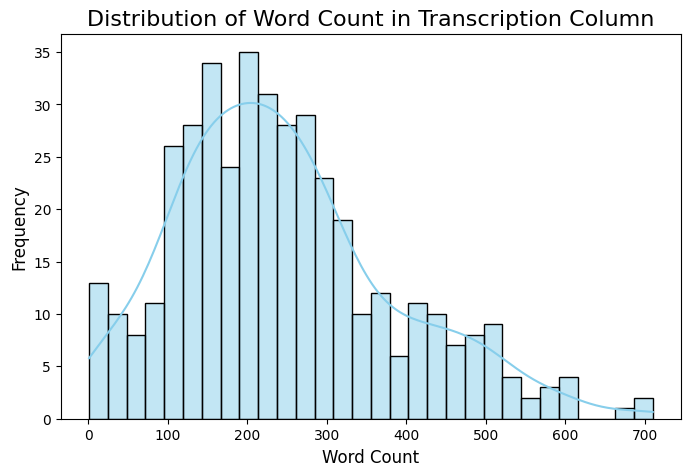

In [150]:
# Histogram of word counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['transcription_word_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Word Count in Transcription Column', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [165]:
import re
import string
from transformers import BertTokenizer
from bs4 import BeautifulSoup
import nltk
import pandas as pd  

# Download NLTK data for sentence tokenization (ensure 'punkt' is available)
nltk.download('punkt')

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def clean_and_tokenize(df, column_name='Transcription'):
    
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return df
    
    def clean_text(text):
        if not text or pd.isna(text):  # Check for empty or NaN values
            return []  # Return an empty list if the text is invalid

        # Lowercase the text
        text = text.lower()
        
        # Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
        
        # Remove HTML tags
        text = BeautifulSoup(text, "html.parser").get_text()
        
        # Remove punctuation
        text = text.translate(str.maketrans("", "", string.punctuation))
        
        # Remove special characters and numbers
        text = re.sub(r"[^a-zA-Z\s]", "", text)

        # Normalize multiple spaces to a single space
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Tokenize the text using BERT tokenizer (subword-level)
        tokens = tokenizer.tokenize(text)
        
        # Rejoin tokens into a single string
        cleaned_text = " ".join(tokens)
        
        # Alternative sentence tokenization using re.split()
        sentences = re.split(r'(?<=[.!?])\s+', cleaned_text)
        
        return sentences

    # Debug: Print first few rows before cleaning
    print(f"First few rows of the column '{column_name}':")
    print(df[column_name].head())
    
    # Apply the clean_text function to each entry in the column
    df['Responses'] = df[column_name].apply(clean_text)
    
    # Debug: Check if the Responses column has been added
    if 'Responses' in df.columns:
        print(f"'Responses' column has been created successfully.")
    else:
        print(f"Error: 'Responses' column not created.")
    
    # Print the DataFrame with Transcriptions and Responses
    print(df[['Transcription', 'Responses']].head())
    
    return df

# Output
df_cleaned = clean_and_tokenize(df)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shashinimashi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First few rows of the column 'Transcription':
0    The Australian Federal Police Afp Welcomes The...
1    The Disr Have Called For Public Submissions To...
2    The Office Of The Australian Information Commi...
3    Canvas Mission Is To Empower The World To Desi...
4    The Law Council Welcomes The Opportunity To Pr...
Name: Transcription, dtype: object
'Responses' column has been created successfully.
                                       Transcription  \
0  The Australian Federal Police Afp Welcomes The...   
1  The Disr Have Called For Public Submissions To...   
2  The Office Of The Australian Information Commi...   
3  Canvas Mission Is To Empower The World To Desi...   
4  The Law Council Welcomes The Opportunity To Pr...   

                                           Responses  
0  [the australian federal police af ##p welcome ...  
1  [the di ##sr have called for public submission...  
2  [the office of the australian information comm...  
3  [canvas mission is to em ##power t

/var/folders/s1/xx81lcvn0kq8swqwckfrftb40000gn/T/ipykernel_56461/2575543807.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Responses'] = df[column_name].apply(clean_text)


In [166]:
df_cleaned.head()

,ResponseID,Topic,Transcription,word_count,transcription_word_count,Responses
0,510,Supporting Responsible Ai Discussion Paper,The Australian Federal Police Afp Welcomes The...,550,518,[the australian federal police af ##p welcome ...
1,507,Safe And Responsible Ai In Australia’,The Disr Have Called For Public Submissions To...,226,213,[the di ##sr have called for public submission...
2,506,Safe And Responsible Ai In Australia\r\nDiscus...,The Office Of The Australian Information Commi...,579,545,[the office of the australian information comm...
3,505,Canvas Approach To Ai,Canvas Mission Is To Empower The World To Desi...,108,103,[canvas mission is to em ##power the world to ...
4,504,Safe And Responsible Ai In\r\nAustralia,The Law Council Welcomes The Opportunity To Pr...,436,410,[the law council welcome ##s the opportunity t...


In [167]:
#  Calculate word count for each Response
df_cleaned['word_count'] = df_cleaned['Responses'].apply(lambda x: len(str(x).split()))

# Get descriptive statistics for the word count
word_count_stats = df_cleaned['word_count'].describe()

print(word_count_stats)

count    408.000000
mean     264.850490
std      149.770027
min        1.000000
25%      157.750000
50%      243.500000
75%      341.000000
max      786.000000
Name: word_count, dtype: float64


/var/folders/s1/xx81lcvn0kq8swqwckfrftb40000gn/T/ipykernel_56461/2871606896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['word_count'] = df_cleaned['Responses'].apply(lambda x: len(str(x).split()))


Train/Validation/Test Split

In [168]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)  # 80% training data
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)  # 10% validation, 10% test

print(f"Training Set: {len(train_df)}")
print(f"Validation Set: {len(val_df)}")
print(f"Test Set: {len(test_df)}")


Training Set: 326
Validation Set: 41
Test Set: 41


In [169]:
# Print the column names of each dataframe
print(f"train_df columns: {train_df.columns}")
print(f"val_df columns: {val_df.columns}")
print(f"test_df columns: {test_df.columns}")


train_df columns: Index(['ResponseID', 'Topic', 'Transcription', 'word_count',
       'transcription_word_count', 'Responses'],
      dtype='object')
val_df columns: Index(['ResponseID', 'Topic', 'Transcription', 'word_count',
       'transcription_word_count', 'Responses'],
      dtype='object')
test_df columns: Index(['ResponseID', 'Topic', 'Transcription', 'word_count',
       'transcription_word_count', 'Responses'],
      dtype='object')


In [170]:
# Check the first few rows of 'Responses' column in each dataset
print(train_df['Responses'].head())
print(val_df['Responses'].head())
print(test_df['Responses'].head())


339    [the paper does not acknowledge the catastroph...
3      [canvas mission is to em ##power the world to ...
18     [the interactive games entertainment associati...
133    [king wood mall ##eson ##s welcome ##s the opp...
120    [this submission concerns the formation of ai ...
Name: Responses, dtype: object
33     [the centre for media transition is conducting...
235    [this response to the australian government th...
82     [crest brings a multi ##dis ##ci ##plin ##ary ...
252    [que ##son how can the australian government f...
343    [australia post appreciate ##s the opportunity...
Name: Responses, dtype: object
134    [the financial services council f ##sc welcome...
70     [property exchange australia ltd pe ##xa is pl...
294    [there exist several potential risks from arti...
96     [thank you for the opportunity to respond to t...
9      [banks have a history of using technology to i...
Name: Responses, dtype: object


In [172]:
# Check how many valid responses are left
print(f"Valid Train Responses: {len([r for r in train_responses if r != ''])}")
print(f"Valid Validation Responses: {len([r for r in val_responses if r != ''])}")
print(f"Valid Test Responses: {len([r for r in test_responses if r != ''])}")


Valid Train Responses: 326
Valid Validation Responses: 41
Valid Test Responses: 41


In [174]:
# Check the first few responses after cleaning
print(train_df['Responses'].head())
print(val_df['Responses'].head())
print(test_df['Responses'].head())

# Check if there are any empty or None values
empty_train_responses = train_df['Responses'].apply(lambda x: len(x) == 0 if isinstance(x, list) else True)
empty_val_responses = val_df['Responses'].apply(lambda x: len(x) == 0 if isinstance(x, list) else True)
empty_test_responses = test_df['Responses'].apply(lambda x: len(x) == 0 if isinstance(x, list) else True)

print(f"Empty Train Responses: {empty_train_responses.sum()}")
print(f"Empty Validation Responses: {empty_val_responses.sum()}")
print(f"Empty Test Responses: {empty_test_responses.sum()}")


339    [the paper does not acknowledge the catastroph...
3      [canvas mission is to em ##power the world to ...
18     [the interactive games entertainment associati...
133    [king wood mall ##eson ##s welcome ##s the opp...
120    [this submission concerns the formation of ai ...
Name: Responses, dtype: object
33     [the centre for media transition is conducting...
235    [this response to the australian government th...
82     [crest brings a multi ##dis ##ci ##plin ##ary ...
252    [que ##son how can the australian government f...
343    [australia post appreciate ##s the opportunity...
Name: Responses, dtype: object
134    [the financial services council f ##sc welcome...
70     [property exchange australia ltd pe ##xa is pl...
294    [there exist several potential risks from arti...
96     [thank you for the opportunity to respond to t...
9      [banks have a history of using technology to i...
Name: Responses, dtype: object
Empty Train Responses: 0
Empty Validation Responses:

Embedding Creation

In [176]:
from sentence_transformers import SentenceTransformer
import torch
import numpy as np

# Initialize the SentenceTransformer model (all-mpnet-base-v2)
model = SentenceTransformer('all-mpnet-base-v2')

# Function to generate sentence embeddings
def get_sentence_embeddings(text_list):
    # Generate sentence embeddings for the text list
    return model.encode(text_list, convert_to_tensor=True)

# Flatten the list of sentences (Responses are lists of sentences, so flatten them into one list)
def flatten_responses(responses):
    return [sentence for response in responses for sentence in response]

# For the training, validation, and test sets, flatten the responses before getting embeddings
train_flat_responses = flatten_responses(train_df['Responses'].tolist())
val_flat_responses = flatten_responses(val_df['Responses'].tolist())
test_flat_responses = flatten_responses(test_df['Responses'].tolist())

# Get embeddings for the flattened responses
train_embeddings = get_sentence_embeddings(train_flat_responses)
val_embeddings = get_sentence_embeddings(val_flat_responses)
test_embeddings = get_sentence_embeddings(test_flat_responses)

# Now, group by ResponseID (Mean Pooling) - assuming 'ResponseID' is already available
# Grouping the responses by ResponseID and applying mean pooling to get one embedding per response
def group_by_response_id(df, embeddings):
    response_embeddings = {}
    
    # Iterate through unique ResponseIDs
    for response_id in df['ResponseID'].unique():
        # Get sentences for the given ResponseID
        sentences = df[df['ResponseID'] == response_id]['Responses'].tolist()
        
        # Flatten the sentences for the ResponseID
        sentences_flat = flatten_responses(sentences)
        
        # Generate sentence embeddings for the flattened sentences
        sentences_embeddings = model.encode(sentences_flat, convert_to_tensor=True)
        
        # Apply mean pooling using PyTorch's .mean() method along the right axis
        response_embeddings[response_id] = sentences_embeddings.mean(dim=0)  # Mean Pooling
    
    return response_embeddings

# Example for training, validation, and test sets
train_response_embeddings = group_by_response_id(train_df, train_embeddings)
val_response_embeddings = group_by_response_id(val_df, val_embeddings)
test_response_embeddings = group_by_response_id(test_df, test_embeddings)


In [177]:
import pickle

# Save train response embeddings
with open('train_response_embeddings.pkl', 'wb') as f:
    pickle.dump(train_response_embeddings, f)

# Save validation response embeddings
with open('val_response_embeddings.pkl', 'wb') as f:
    pickle.dump(val_response_embeddings, f)

# Save test response embeddings
with open('test_response_embeddings.pkl', 'wb') as f:
    pickle.dump(test_response_embeddings, f)


Training Phase
Cosine Similarity Calculation

In [213]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import f1_score
import numpy as np
from sentence_transformers import SentenceTransformer

# Initialize the SentenceTransformer model (all-mpnet-base-v2)
model = SentenceTransformer('all-mpnet-base-v2')

# Function to calculate cosine similarity
def calculate_cosine_similarity(query_embedding, response_embeddings):
    similarities = {}
    for response_id, embedding in response_embeddings.items():
        # Ensure both embeddings are moved to CPU and converted to NumPy
        similarity = cosine_similarity(
            query_embedding.cpu().numpy(),
            embedding.cpu().numpy().reshape(1, -1)
        )[0][0]
        similarities[response_id] = similarity
    return similarities

# Function to find semantically related responses based on the threshold
def find_semantically_related_responses(response_embeddings, keyword_embeddings, threshold=0.6):
    related_responses = {}
    # Ensure keyword embeddings are moved to CPU
    for keyword_embedding in keyword_embeddings:
        keyword_embedding = keyword_embedding.cpu()  # Ensure keyword embedding is on CPU
        similarities = calculate_cosine_similarity(keyword_embedding.reshape(1, -1), response_embeddings)
        
        # Filter by threshold
        for response_id, similarity in similarities.items():
            if similarity >= threshold:
                if response_id not in related_responses:
                    related_responses[response_id] = similarity
                else:
                    related_responses[response_id] = max(related_responses[response_id], similarity)
    return related_responses

# Function to optimize the threshold
def find_optimal_threshold(response_embeddings, keyword_embeddings, ground_truth_labels, thresholds):
    best_threshold = 0
    best_f1_score = 0
    f1_scores = []

    # Ensure that ground_truth_labels is a list or numpy array
    if isinstance(ground_truth_labels, dict):
        ground_truth_labels = list(ground_truth_labels.values())  # Convert dict to list if needed
    elif isinstance(ground_truth_labels, np.ndarray):
        ground_truth_labels = ground_truth_labels.tolist()  # Convert numpy array to list if needed

    # Iterate through all thresholds
    for threshold in thresholds:
        # Get related responses based on the current threshold
        related_responses = find_semantically_related_responses(response_embeddings, keyword_embeddings, threshold)
        
        # Convert response IDs into binary predictions (1 for related, 0 otherwise)
        y_pred = [1 if response_id in related_responses else 0 for response_id in response_embeddings.keys()]
        
        # Calculate the F1 score for this threshold
        f1 = f1_score(ground_truth_labels, y_pred)
        f1_scores.append(f1)

        # Track the best threshold and its F1 score
        if f1 > best_f1_score:
            best_f1_score = f1
            best_threshold = threshold

    return best_threshold, f1_scores

# Define the range of thresholds you want to explore
thresholds = np.arange(0, 1.01, 0.01)

# Find the optimal threshold using training data
best_threshold, f1_scores = find_optimal_threshold(train_response_embeddings, keyword_embeddings, ground_truth_labels, thresholds)

print(f"Optimal Threshold: {best_threshold}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

Optimal Threshold: 0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [ ]:
# Function to find semantically related responses based on the threshold
def find_semantically_related_responses(response_embeddings, keywords, threshold=0.15):
    related_responses = {}

    # Generate embeddings for keywords using SentenceTransformer 
    keyword_embeddings = model.encode(keywords, convert_to_tensor=True)

    # For each keyword embedding, calculate the cosine similarity with the responses
    for keyword_embedding in keyword_embeddings:
        similarities = calculate_cosine_similarity(keyword_embedding.reshape(1, -1), response_embeddings)
        for response_id, similarity in similarities.items():
            if similarity >= threshold:
                if response_id not in related_responses:
                    related_responses[response_id] = similarity
                else:
                    related_responses[response_id] = max(related_responses[response_id], similarity)
    
    return related_responses

# Example usage:
keywords = ["climate change", "global warming", "weather patterns"]

# Assuming you already have the response embeddings for training, e.g.:
# response_embeddings = train_response_embeddings

# Find semantically related responses
threshold = 0.6
related_responses = find_semantically_related_responses(train_response_embeddings, keywords, threshold)

# Output the results
print("\nRelated Responses:")
for response_id, similarity in related_responses.items():
    print(f"{response_id}: Similarity = {similarity:.4f}")

In [204]:
# Step 3: Function to optimize the threshold using F1-score
def find_optimal_threshold(response_embeddings, keyword_embeddings, ground_truth_labels, thresholds=np.arange(0, 1.01, 0.01)):
    f1_scores = []
    for threshold in thresholds:
        # Get related responses based on the current threshold
        related_responses = find_semantically_related_responses(response_embeddings, keyword_embeddings, threshold)
        
        # Convert response IDs into binary predictions (1 for related, 0 otherwise)
        y_pred = [1 if response_id in related_responses else 0 for response_id in response_embeddings.keys()]
        y_true = [ground_truth_labels[response_id] for response_id in response_embeddings.keys()]
        
        # Calculate F1-score
        f1 = f1_score(y_true, y_pred, zero_division=1)
        f1_scores.append(f1)
    
    # Identify the best threshold
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold, f1_scores

# Update: Calculate cosine similarity ensuring tensors are on CPU
def calculate_cosine_similarity(query_embedding, response_embeddings):
    """
    Calculate cosine similarity between the query embedding and a dictionary of response embeddings.
    
    Args:
    query_embedding (torch.Tensor): The embedding of the query or keyword(s) (on CPU).
    response_embeddings (dict): A dictionary where keys are response IDs and values are their embeddings (on CPU).
    
    Returns:
    dict: A dictionary of response IDs and their similarity scores.
    """
    query_embedding = query_embedding.cpu().numpy()  # Ensure query is on CPU and convert to NumPy
    similarities = {}
    for response_id, embedding in response_embeddings.items():
        embedding = embedding.cpu().numpy()  # Ensure response embedding is on CPU and convert to NumPy
        similarity = cosine_similarity(query_embedding.reshape(1, -1), embedding.reshape(1, -1))[0][0]
        similarities[response_id] = similarity
    return similarities

# Update: Find related responses ensuring tensors are on CPU
def find_semantically_related_responses(response_embeddings, keyword_embeddings, threshold=0.6):
    """
    Find responses semantically related to given keywords based on cosine similarity.
    
    Args:
    response_embeddings (dict): A dictionary of response embeddings with response IDs as keys (on CPU).
    keyword_embeddings (torch.Tensor): Embedding(s) for user-provided keywords (on CPU).
    threshold (float): Cosine similarity threshold for filtering responses.
    
    Returns:
    dict: Filtered dictionary of response IDs and their similarity scores.
    """
    related_responses = {}
    # For each keyword, calculate cosine similarity
    for keyword_embedding in keyword_embeddings:
        keyword_embedding = keyword_embedding.cpu()  # Ensure keyword embedding is on CPU
        similarities = calculate_cosine_similarity(keyword_embedding, response_embeddings)
        # Filter by threshold
        for response_id, similarity in similarities.items():
            if similarity >= threshold:
                if response_id not in related_responses:
                    related_responses[response_id] = similarity
                else:
                    related_responses[response_id] = max(related_responses[response_id], similarity)
    return related_responses

# Example: User-provided keywords and ground truth labels
user_keywords = ['AI', 'Security']

# Get the embedding for the user keywords
keyword_embeddings = model.encode(user_keywords, convert_to_tensor=True).cpu()

# Ground truth labels (1 for relevant, 0 for irrelevant) for training data
ground_truth_labels = {
    response_id: 1 if response_id in ['response_1', 'response_2'] else 0  # Example labels
    for response_id in train_response_embeddings.keys()
}

# Step 4: Find the optimal threshold
thresholds = np.arange(0, 1.01, 0.01)
best_threshold, f1_scores = find_optimal_threshold(train_response_embeddings, keyword_embeddings, ground_truth_labels, thresholds)

print(f"Best Threshold: {best_threshold}")

# Step 5: Filter responses with the optimal threshold
filtered_responses = find_semantically_related_responses(train_response_embeddings, keyword_embeddings, best_threshold)

print("\nFiltered Responses for T5 Summarization:")
for response_id, similarity in filtered_responses.items():
    print(f"Response ID: {response_id}, Similarity: {similarity:.4f}")


Best Threshold: 0.62

Filtered Responses for T5 Summarization:


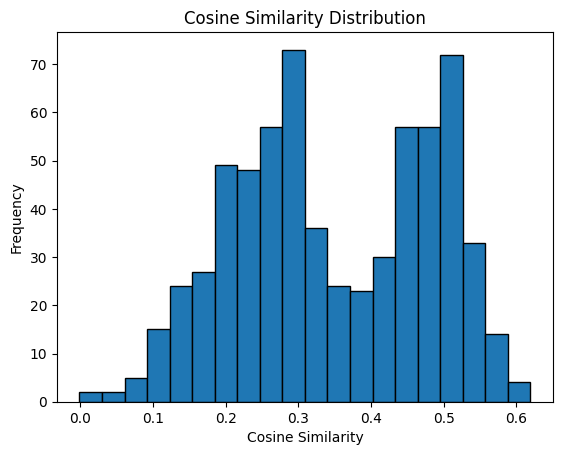

In [205]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Ensure both embeddings (keywords and responses) are 2D (n, 768) arrays
# If `keyword_embeddings` is a tensor, convert it to NumPy and flatten (if necessary)
keyword_embeddings_cpu = keyword_embeddings.cpu().numpy()

# Get the cosine similarities for all responses
similarities = []
for response_id, embedding in train_response_embeddings.items():
    # Ensure the response embedding is on the CPU and converted to NumPy
    embedding_cpu = embedding.cpu().numpy()

    # Loop through all keyword embeddings (assuming keywords are in a batch of embeddings)
    for keyword_embedding in keyword_embeddings_cpu:
        # Calculate cosine similarity between the keyword embedding and response embedding
        similarity = cosine_similarity(
            keyword_embedding.reshape(1, -1),  # Reshaping keyword to be 2D (1, 768)
            embedding_cpu.reshape(1, -1)       # Reshaping response to be 2D (1, 768)
        )[0][0]
        similarities.append(similarity)

# Plot the distribution of similarities
plt.hist(similarities, bins=20, edgecolor='black')
plt.title("Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()


In [206]:
if not filtered_texts:
    print("\nNo responses passed the threshold. Lowering the threshold or revising filtering criteria is needed.")
    filtered_texts = ["No relevant responses found."]



No responses passed the threshold. Lowering the threshold or revising filtering criteria is needed.


In [207]:
print("\nFiltered Texts:")
print(filtered_texts)



Filtered Texts:
['No relevant responses found.']


In [208]:
# Step 6: Prepare data for T5 summarization
# Convert the filtered responses to a format that the T5 model can use.
filtered_texts = [train_df.loc[train_df['ResponseID'] == response_id, 'Responses'].values[0] for response_id in filtered_responses.keys()]

# Example: Feed filtered responses into T5 for summarization
# You can use HuggingFace's T5Tokenizer and T5ForConditionalGeneration to perform summarization
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Initialize T5 model and tokenizer
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Concatenate filtered responses and prepare input
input_text = "summarize: " + " ".join(filtered_texts)
input_ids = t5_tokenizer.encode(input_text, return_tensors="pt", truncation=True)

# Generate the summary
summary_ids = t5_model.generate(input_ids, max_length=150, num_beams=5, early_stopping=True)
summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("\nGenerated Summary:")
print(summary)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



Generated Summary:

